In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [2]:
rcParams['figure.figsize']=10,6

### Loading the Dataset

In [3]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Dropping the column

As Unnamed:0 column is just as index no.

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)  #Dropping the Unnamed:0 column

In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Checking the info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- We have 4 columns TV,Radio,Newspaper and Sales and all the numerical columns

### Checking the shape

In [7]:
df.shape

(200, 4)

- We have 200 rows and 4 columns

### Checking the Null Values

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no null values in our dataset

### Checking for duplicates

In [9]:
df.duplicated().sum()

0

- There are 0 duplicates values in our dataset

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Descriptive Statistics

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- 1.The mean promotion budget for TV is 147.04 million.
- 2.The max promotion budget for TV is 296.4 million.
- 3.The min promotion budget for TV is 0.7 million.
- 4.The mean promotion budget for Radio is 23.26 million.
- 5.The max promotion budget for Radio is 49.6 million.
- 6.The min promotion budget for Radio is 0 million.
- 7.The mean promotion budget for Newspaper is 30.554 million.
- 8.The max promotion budget for Newspaper is 114 million.
- 9.The min promotion budget for Newspaper is 0.3 million.
- 10.The mean values of Sales in million is 14.0225 million.
- 11.The max Sales is 27 million.
- 12.The min Sales is 1.6 million.

### Univariate Analysis- Check the distribution of data

In [12]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

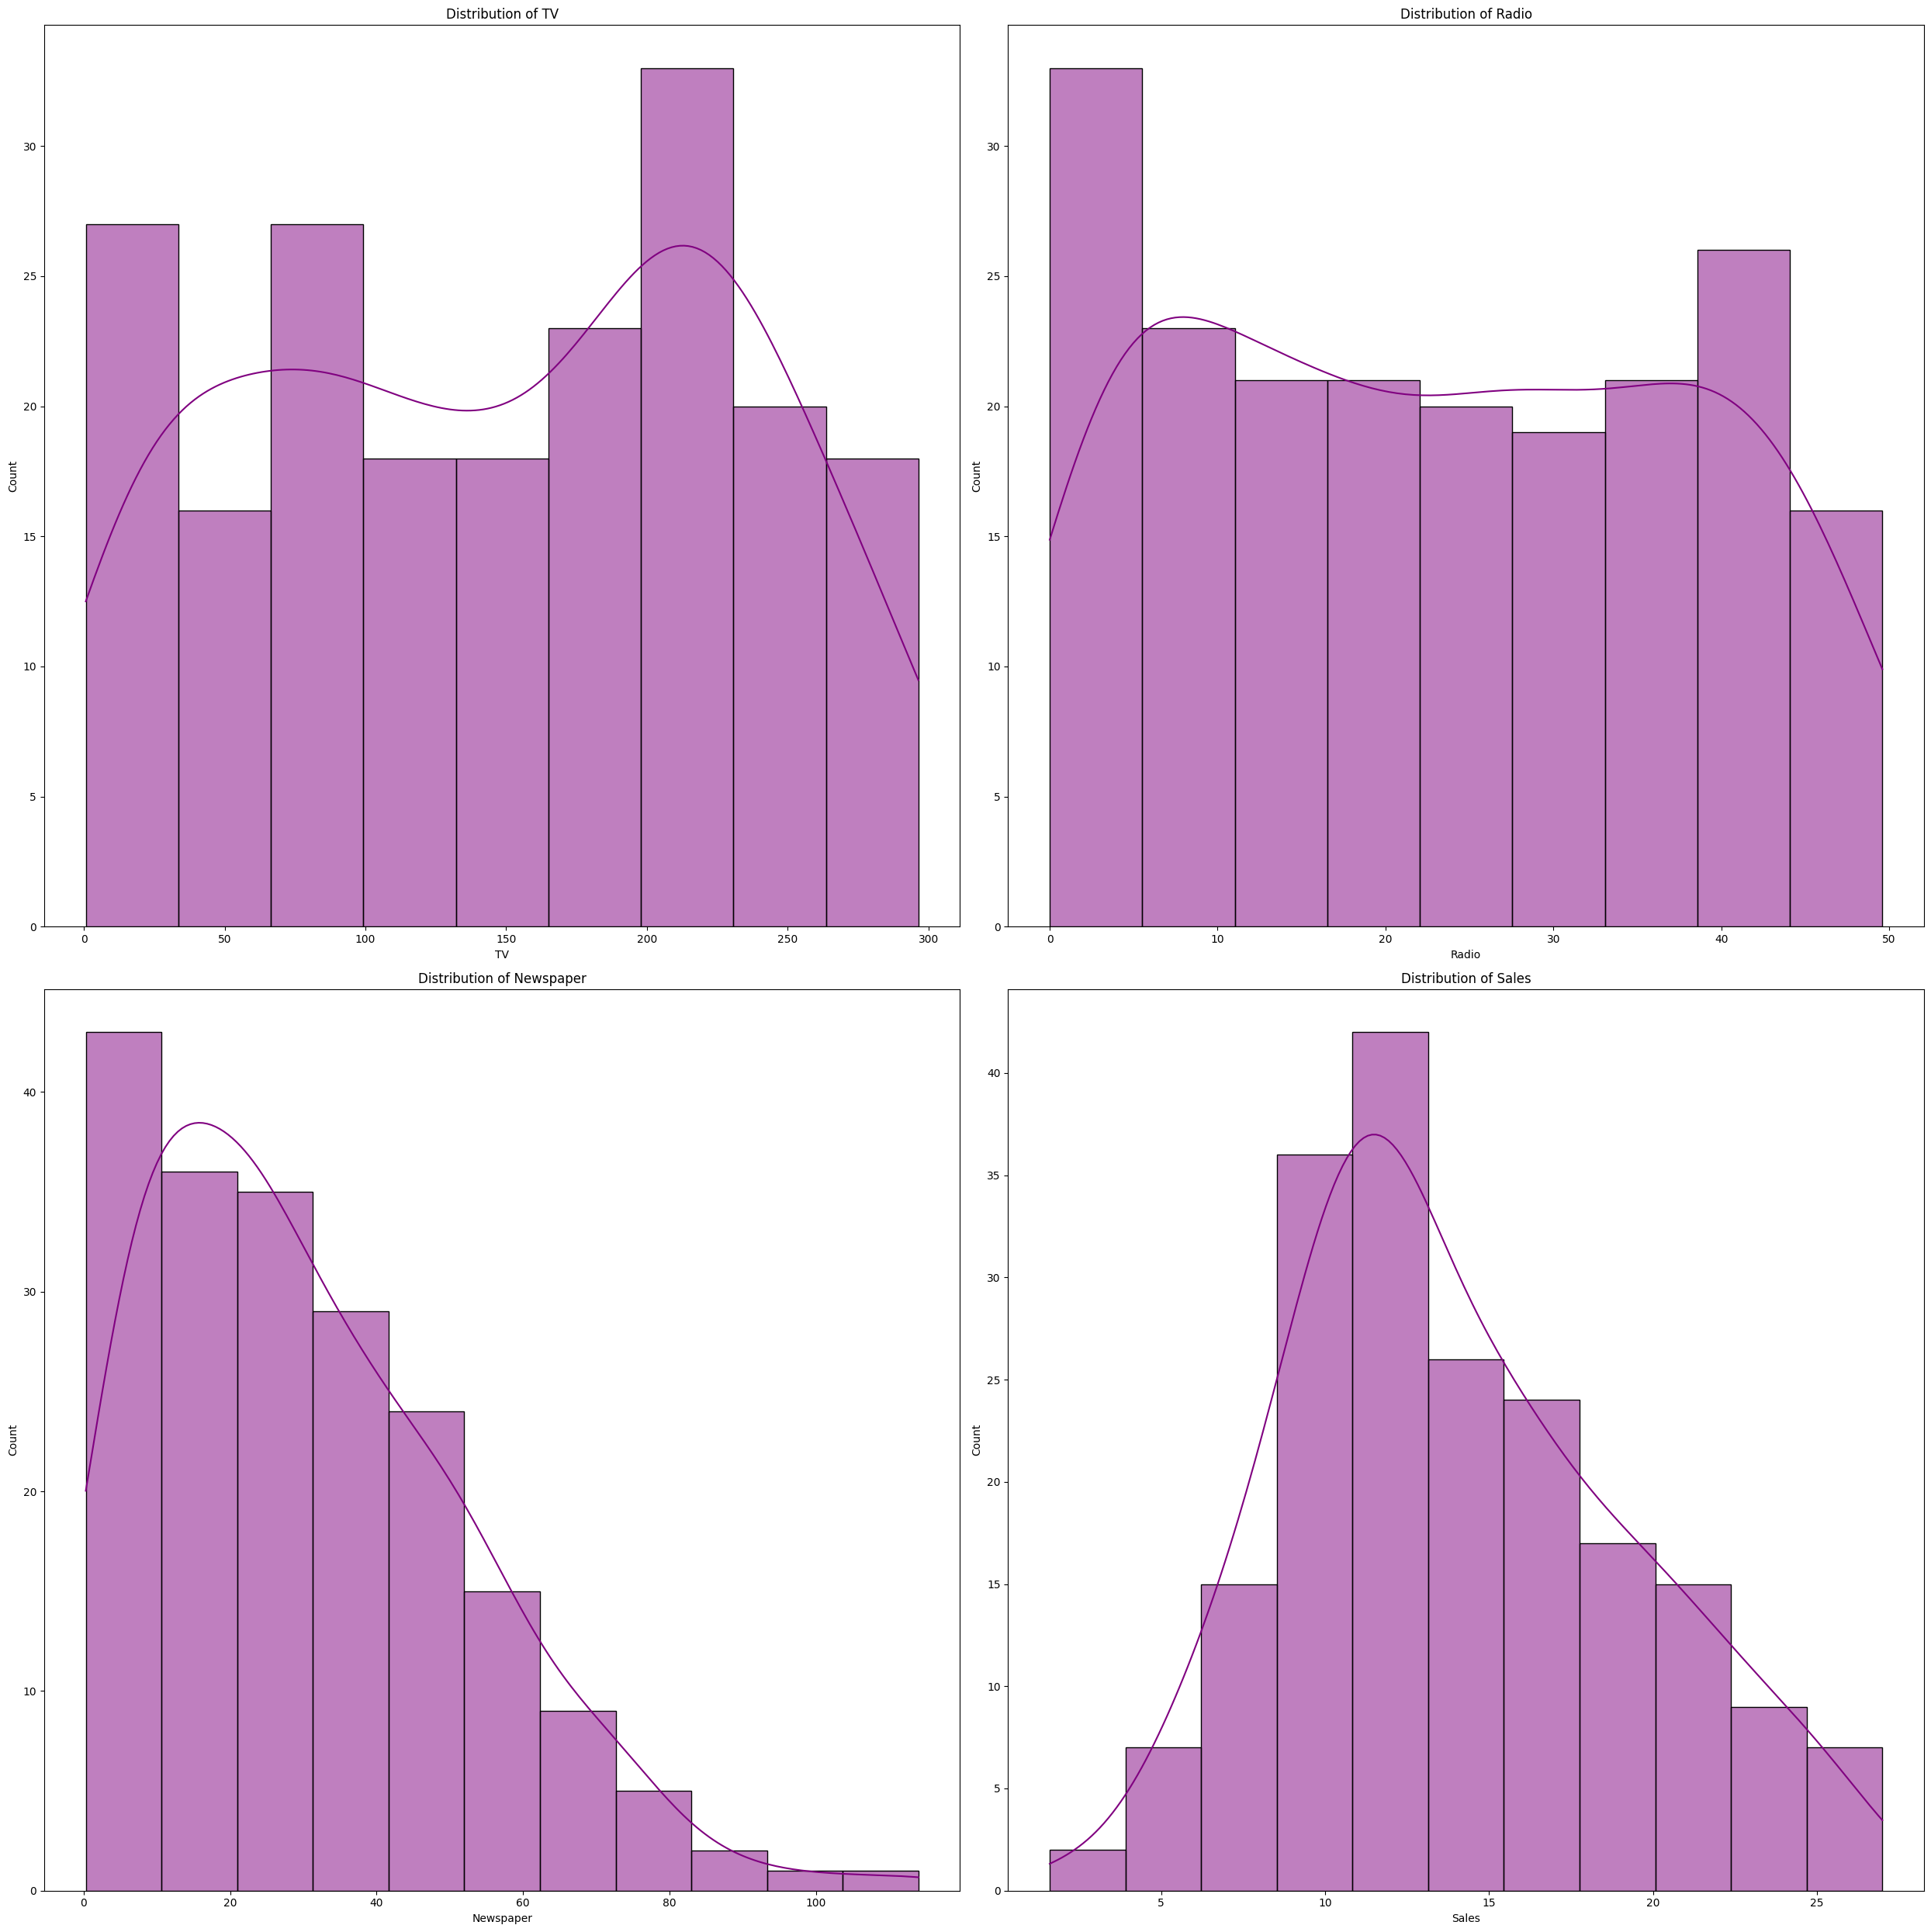

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))

for i, subplot in zip(num_cols, ax.flatten()):
    sns.histplot(df[i], ax=subplot, kde=True, color='purple')
    subplot.set_title(f'Distribution of {i}')

plt.tight_layout()
plt.show()


### Check for Outliers

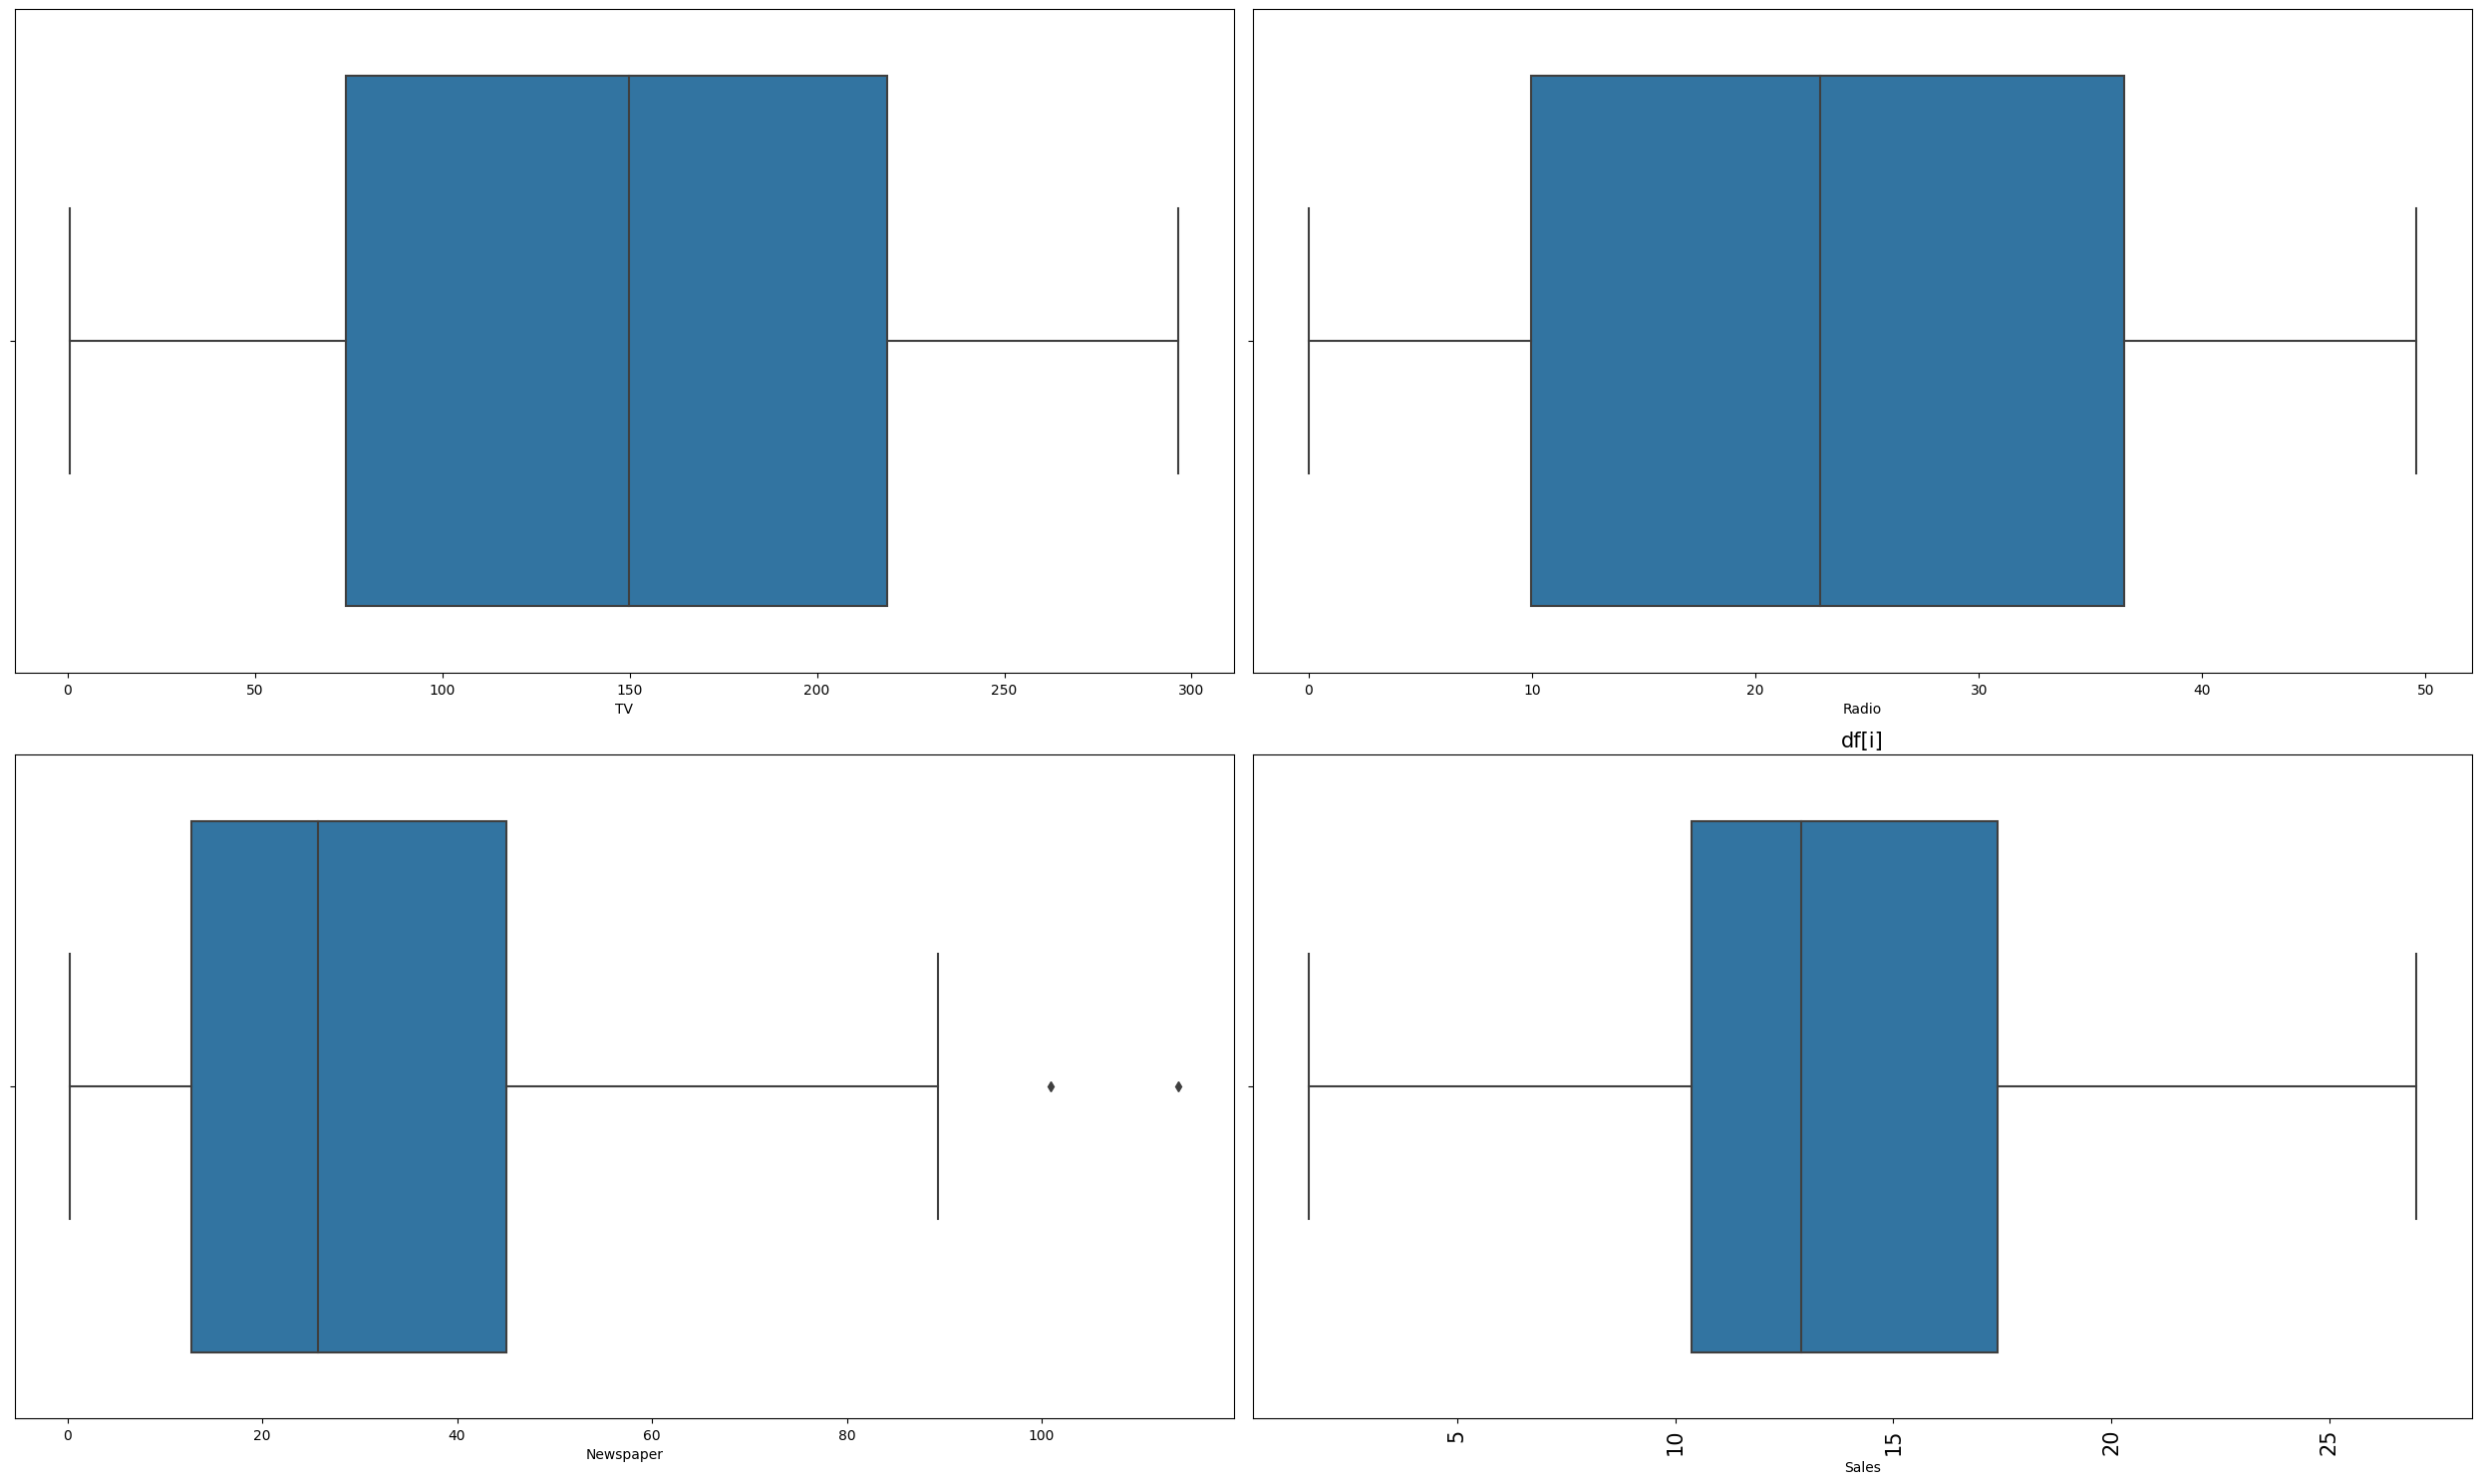

In [14]:
fig,ax=plt.subplots(2,2,figsize=(25,15))

for i,subplot in zip(num_cols,ax.flatten()):
    sns.boxplot(df[i],ax=subplot)
    plt.title('df[i]',fontsize=15)
    plt.xticks(rotation='vertical',fontsize=15)
    
plt.tight_layout()
plt.show()

- There is presence of minimum outliers in Newspaper
- There are no outliers in TV,Radio,Sales columns.

- 1.TV is having strong positive correlation with Sales.
- 2.Radio is having positive correlation with Sales.
- 3.Newspaper is having weak positive correlation with Sales.

In [15]:
cols=df.columns
cols

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

We will create subplots between Independent variable and Dependent variable(Sales).So lets create a sctter plots where the list has only dependent variable

In [16]:
cols=list(df.drop('Sales',axis=1).columns)
cols

['TV', 'Radio', 'Newspaper']

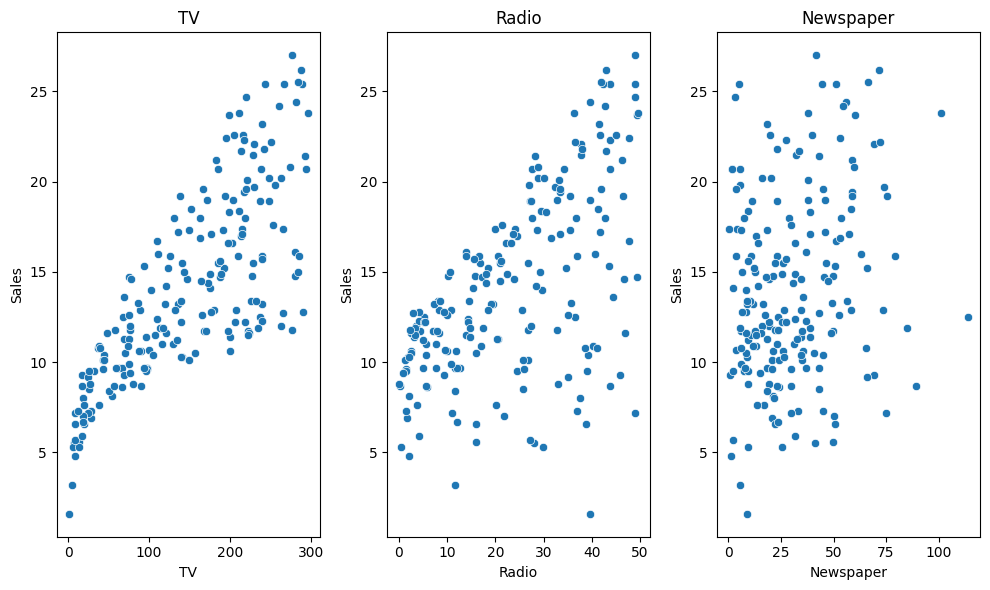

In [17]:
for i in cols:
    indices=cols.index(i)
    
    plt.subplot(1,3,indices+1)
    sns.scatterplot(x=i,y='Sales',data=df)
    plt.title(i)
    
plt.tight_layout()
plt.show()

### Heatmap for correlation plot

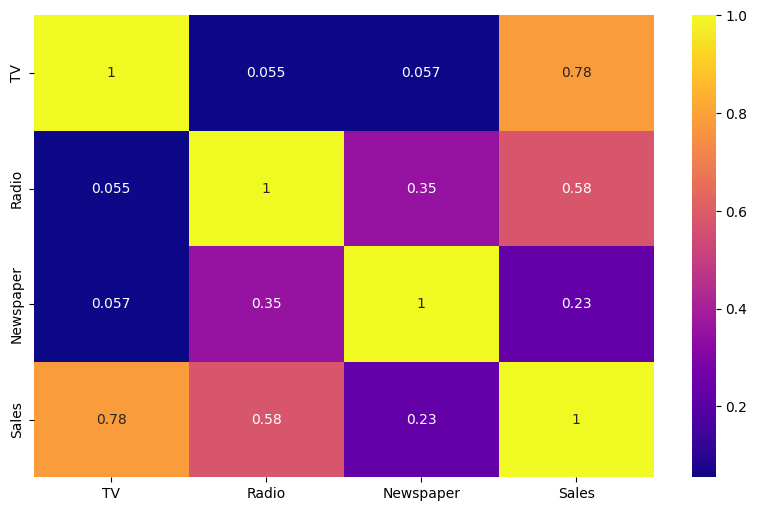

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

- 1.TV is having strong positive correlation with Sales of 0.78.
- 2.Radio is having positive correlation with Sales of 0.58.
- 3.Newspaper is having weak positive correlation with Sales of 0.23.

### Pairplot

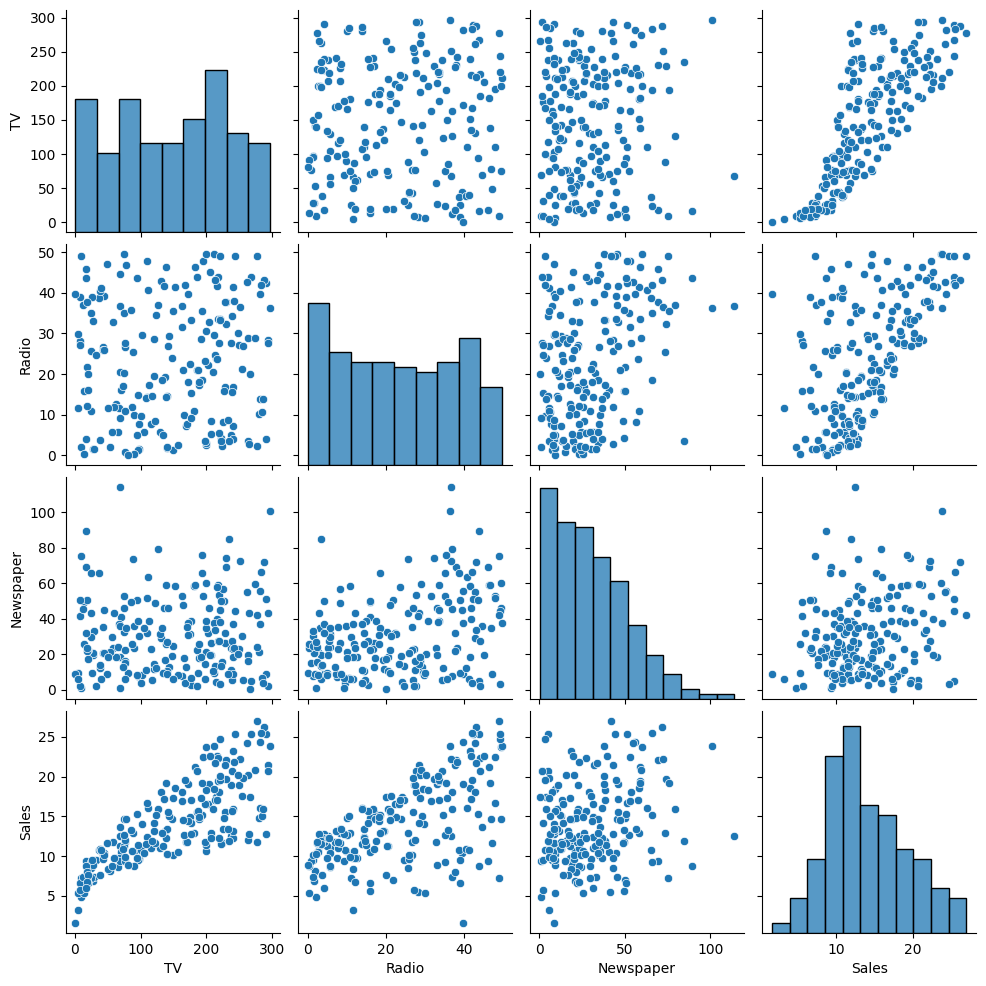

In [19]:
sns.pairplot(df)

### Checking the variation in the data

In [20]:
df.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64

- The value of 85.85 indicates a higher degree of variability in advertising spending on TV.
- The value of 14.84 indicates less degree of variability in advertising spending on Radio.
- The value of 21.77 indicates less degree of variability in advertising spending on Nespaper.

### Scaling the Data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
cols

['TV', 'Radio', 'Newspaper']

In [23]:
cols = ['TV', 'Radio', 'Newspaper']

# Extract the specified columns
cols_to_scale = df[cols]

sc= StandardScaler()
cols_sc = sc.fit_transform(cols_to_scale)

# Create a DataFrame with the scaled columns
cols_sc_df = pd.DataFrame(cols_sc, columns=cols)

cols_sc_df.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


### Model building

In [24]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=10)

In [27]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(160, 3)
(40, 3)
(160,)
(40,)


### Building the first model- Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [29]:
lr=LinearRegression()

model_lr=lr.fit(xtrain,ytrain)

pred_train=model_lr.predict(xtrain)
pred_test=model_lr.predict(xtest)

In [30]:
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)

R2 Train:  0.9209087553499528
R2 Test:  0.8353672324670594


- R2 Train: 0.9209 - This means that approximately 92.09% of the variance in the training set is explained by the model.
- R2 Test: 0.8354 - This means that approximately 83.54% of the variance in the test set is explained by the model.

### Calculate the RMSE Value

In [31]:
print("RMSE Train: ",np.sqrt(mean_squared_error(ytrain,pred_train)))
print("RMSE Test: ",np.sqrt(mean_squared_error(ytest,pred_test)))

RMSE Train:  1.3633035872281898
RMSE Test:  2.5885298446278098


- RMSE Train: 1.3633 - On average, the model's predictions on the training set are off by approximately 1.36 units in terms of Sales.
- RMSE Test: 2.5885 - On average, the model's predictions on the test set are off by approximately 2.59 units in terms of Sales.

### Build the second model- RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf=RandomForestRegressor()

rf=rf.fit(xtrain,ytrain)

pred_train_rf=rf.predict(xtrain)

pred_test_rf=rf.predict(xtest)

In [34]:
r2_train=r2_score(ytrain,pred_train_rf)
r2_test=r2_score(ytest,pred_test_rf)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)

R2 Train:  0.9970926960563818
R2 Test:  0.9789377418539958


- R2 Train: 0.9971 - This means that approximately 99.71% of the variance in the training set is explained by the Random Forest model.

- R2 Test: 0.9793 - This means that approximately 97.93% of the variance in the test set is explained by the Random Forest model.

**These R2 values are very high, indicating that the Random Forest model is fitting the data extremely well.**

### Calculate the RMSE Value

In [35]:
print("RMSE Train: ",np.sqrt(mean_squared_error(ytrain,pred_train_rf)))
print("RMSE Test: ",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

RMSE Train:  0.2613807447957845
RMSE Test:  0.925864649935397


- RMSE Train: 0.2614 - On average, the model's predictions on the training set are off by approximately 0.26 units in terms of Sales.

- RMSE Test: 0.9170 - On average, the model's predictions on the test set are off by approximately 0.92 units in terms of Sales.

These low RMSE values suggest that the Random Forest model is providing very accurate predictions on both the training and testing sets

### Build the third model - GradientBoostingRegressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gbr=GradientBoostingRegressor()

gbr=gbr.fit(xtrain,ytrain)

pred_train_gbr=gbr.predict(xtrain)
pred_test_gbr=gbr.predict(xtest)

In [38]:
r2_train=r2_score(ytrain,pred_train_gbr)
r2_test=r2_score(ytest,pred_test_gbr)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)

R2 Train:  0.9987802041525757
R2 Test:  0.9748795759530186


- R2 Train: 0.9988 - This means that approximately 99.88% of the variance in the training set is explained by the Gradient Boosting model.

- R2 Test: 0.9750 - This means that approximately 97.50% of the variance in the test set is explained by the Gradient Boosting model.

### Calculate the RMSE Value

In [39]:
print("RMSE Train: ",np.sqrt(mean_squared_error(ytrain,pred_train_gbr)))
print("RMSE Test: ",np.sqrt(mean_squared_error(ytest,pred_test_gbr)))

RMSE Train:  0.1693058434639213
RMSE Test:  1.0111335488153257


- RMSE Train: 0.1693 - On average, the model's predictions on the training set are off by approximately 0.17 units in terms of Sales.

- RMSE Test: 1.0079 - On average, the model's predictions on the test set are off by approximately 1.01 units in terms of Sales.

**These low RMSE values suggest that the Gradient Boosting model is providing very accurate predictions on both the training and testing sets**

### Build the fourth model - Xtreme Gradient Boosting

In [40]:
from xgboost import XGBRegressor

In [41]:
xgb = XGBRegressor()

model_xgb = xgb.fit(xtrain, ytrain)

pred_train_xgb = model_xgb.predict(xtrain)
pred_test_xgb = model_xgb.predict(xtest)

In [42]:
r2_train=r2_score(ytrain,pred_train_xgb)
r2_test=r2_score(ytest,pred_test_xgb)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)

R2 Train:  0.9999998885108582
R2 Test:  0.9799436145547211


- R2 Train: 0.9999998885108582 - This suggests that approximately 99.99% of the variance in the training set is explained by the XGBoost model.
- R2 Test: 0.9799436145547211 - This suggests that approximately 97.99% of the variance in the test set is explained by the XGBoost model.

### Calculate the RMSE Value

In [43]:
print("RMSE Train: ",np.sqrt(mean_squared_error(ytrain,pred_train_xgb)))
print("RMSE Test: ",np.sqrt(mean_squared_error(ytest,pred_test_xgb)))

RMSE Train:  0.0016186190922884026
RMSE Test:  0.903485882411156


- RMSE Train: 0.0016 - On average, the model's predictions on the training set are off by approximately 0.0016 units in terms of Sales.
- RMSE Test: 0.9035 - On average, the model's predictions on the test set are off by approximately 0.9035 units in terms of Sales.

**These extremely low RMSE values on both the training and test sets suggest that the XGBoost model is providing very accurate predictions.**

 **Based on the R2 scores and RMSE values, the XGBoost model has performed exceptionally well on both the training and testing sets. It has the highest R2 scores and the lowest RMSE values, indicating that it captures the variance in the target variable very well and provides accurate predictions.**

### The End